## Univariate Analysis
 Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, only one variable is analyzed. It doesn't deal with relationships and it's major purpose is to describe, it takes data, summarizes that data and finds patterns in the data.

In [1]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset into a dataframe(file containing data)

df=pd.read_excel('current.xlsx',index_col=0)

In [3]:
df.shape

(24922, 8)

In [4]:
df.head()

,title,projectname,builder,price,per_sqft,area,status,place
0,4 BHK Villa,NR Infra Ultimus,NR Infra Projects,12900000,4999,2594,Ready to move,Rameswaram Banda
1,2 BHK Apartment,Vasavi Metropolis,Vasavi Group,6070000,5705,1065,Under Construction,Uppal Kalan
2,2 BHK Apartment,Aavasa Constructions Emerald,Aavasa Constructions,8515000,6500,1310,Under Construction,Saroor Nagar
3,3 BHK Apartment,Primark De Stature,Primark Developers,9797000,4699,2085,Under Construction,Kompally
4,2 BHK Apartment,Srija Twin Towers,Srija Infra Developers Hyderabad,5001000,4800,1042,Under Construction,Dammaiguda


In [5]:
# Returns the maximum and minimum values from a particular column.

def values(x):
    max_=df[x].idxmax()
    max_details=pd.DataFrame(df.loc[max_])
    
    min_=df[x].idxmin()
    min_details=pd.DataFrame(df.loc[min_])
    
    both=pd.concat([max_details,min_details],axis=1)
    
    return both

we consider our target variable as price.

In [6]:
values("price")

,21503,24377
title,4 BHK Villa,Residential Plot
projectname,EIPL River Edge Villas,Time City
builder,Square Properties,srikanth
price,610000000,100000
per_sqft,118492,1111
area,5148,90
status,Ready to move,New
place,Kokapet,Kadthal


In [7]:
d=df[(df['price']>=100000)&(df['price']<=1000000)]
d.shape

(447, 8)

In [8]:
d1=d['title'].value_counts()
d1

Residential Plot             438
3  BHK  Apartment              4
2  BHK  Apartment              2
2  BHK  Independent Floor      1
2  BHK  Independent House      1
1  RK  Studio Apartment        1
Name: title, dtype: int64

Text(0.5, 1.0, 'Type of properties')

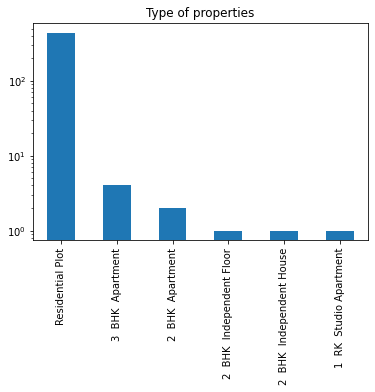

In [9]:
d1.plot.bar() # Plotting bar graph
plt.yscale('log') 
# we use log function so that least values can also be clearly visible.
#(when log is not used values such as 3,2,1,1 are barely visible in graph as highest count is 2121)
plt.title("Type of properties")

In [11]:

d2=d['place'].value_counts()
d2

Shadnagar                     48
Yadagirigutta                 33
Ibrahimpatnam                 32
Alair                         21
Sadashivpet                   18
                              ..
Medipally                      1
Warangal Hyderabad Highway     1
Gopanpally                     1
Osman Nagar                    1
Vinayak Nagar                  1
Name: place, Length: 141, dtype: int64

<AxesSubplot:>

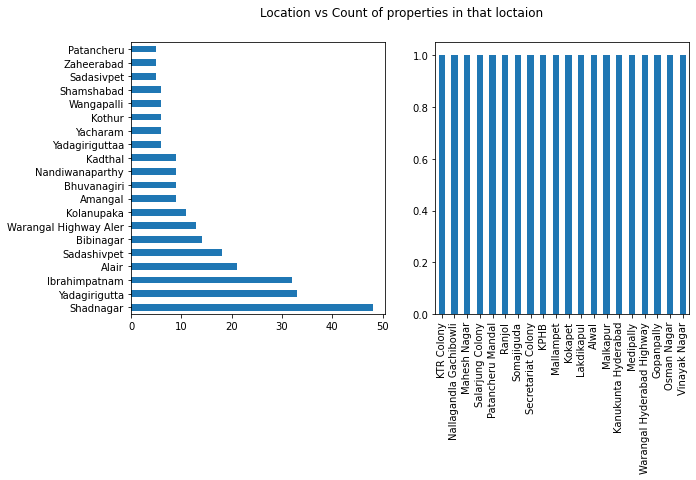

In [16]:
f,ax=plt.subplots(1,2,figsize=(10,5)) # Defining plot size and subplots.
f.suptitle("Location vs Count of properties in that loctaion") # Title for the plot.
d2.head(20).plot(kind='barh',ax=ax[0]) # Plot for top 20 values.

d2.tail(20).plot(kind='bar',ax=ax[1]) # Plot for least 20 values.

In [18]:
#returns total number for locations whose count is 1.

len((d['place'].value_counts())==1)

141

C:\Users\shing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

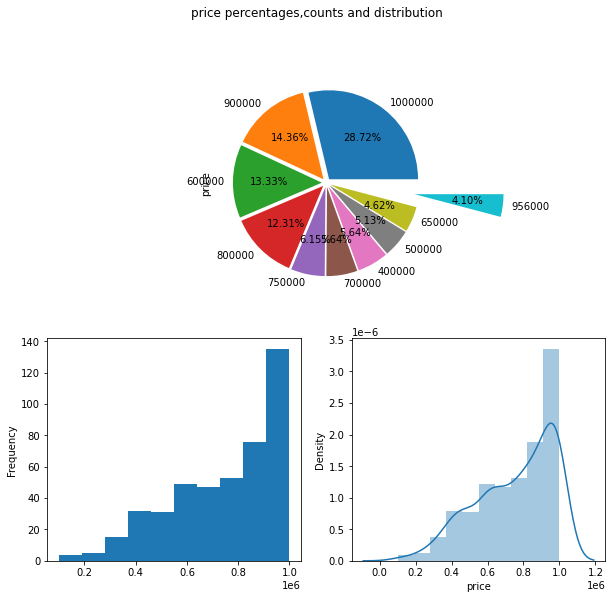

In [20]:
f,ax=plt.subplots(figsize=(10,9)) # Plot size
ax1=plt.subplot(211) 
f.suptitle("price percentages,counts and distribution") # Plot title
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1) # Distance between each sub-pie.
d['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
# Pie plot for top 10 values of price.

ax2=plt.subplot(223)
d['price'].plot.hist() # Histogram for all prices.
ax2.plot

ax3=plt.subplot(224)
sns.distplot(d['price'],ax=ax3) # Distribution plot for all prices.

<AxesSubplot:ylabel='Frequency'>

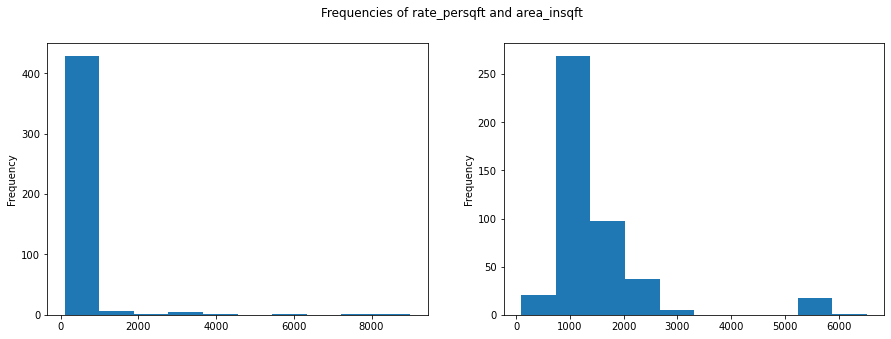

In [22]:
f,ax=plt.subplots(1,2,figsize=(15,5))
f.suptitle("Frequencies of rate_persqft and area_insqft") # Plot title
d['per_sqft'].plot(kind='hist',ax=ax[0]) # Histogram for rate_persqft.

d['area'].plot(kind='hist',ax=ax[1]) # Histogram for area_insqft.

In [23]:
d['status'].value_counts()

New                   294
Resale                144
Ready to move           6
Under Construction      1
Name: status, dtype: int64

C:\Users\shing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


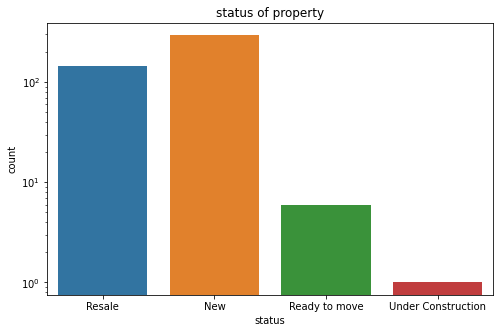

In [24]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(d['status'],ax=ax) # Count plot
plt.title("status of property") # Plot title
plt.yscale('log')
#(log is used such that even small values such as 3,4,6,1 are also visib

In [26]:
b=df[(df['price']>1000000)&(df['price']<=2000000)]
b.shape

(3908, 8)

In [27]:
def title(x):
    x.plot.bar() # x is the dataframe.
    plt.yscale('log')
    plt.title("Type of properties")

In [28]:
def location(x):
    f,ax=plt.subplots(1,2,figsize=(10,5))
    f.suptitle("Location vs Count of properties in that loctaion")
    x.head(20).plot(kind='barh',ax=ax[0])  # x is the dataframe.

    x.tail(20).plot(kind='bar',ax=ax[1]) # x is the dataframe. 

In [29]:
def price(x):
    f,ax=plt.subplots(figsize=(10,9))
    ax1=plt.subplot(211)
    f.suptitle("price percentages,counts and distribution")
    explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1)
    x['price'].value_counts(ascending=False).head(10).plot(kind='pie',autopct="%0.2f%%",explode=explode,ax=ax1)
    # x is the dataframe.
    
    ax2=plt.subplot(223)
    x['price'].plot.hist()  # x is the dataframe.
    ax2.plot

    ax3=plt.subplot(224)
    sns.distplot(x['price'],ax=ax3)  # x is the dataframe.

In [30]:
def area_rate(x):
    f,ax=plt.subplots(1,2,figsize=(15,5))
    f.suptitle("Frequencies of rate_persqft and area_insqft")
    x['persqft'].plot(kind='hist',ax=ax[0])  # x is the dataframe.

    x['area'].plot(kind='hist',ax=ax[1])   # x is the dataframe.

In [31]:
def b_status(x):
    fig,ax=plt.subplots(figsize=(8,5))
    sns.countplot(x['building_status'],ax=ax)  # x is the dataframe.
    plt.title("status of property")
    plt.yscale('log')

In [32]:
b1=b['projectname'].value_counts()
b1

Vasudaika Cosmo Celesse      59
Samooha Golden Gate          34
PR Sandal Park               11
Akshita Golden Pride          8
YBR Avasa Hills               8
                             ..
Leonardo Hrinda Harivillu     1
Alaghar Nagar                 1
Vasavi Colony RWA             1
Empire Greens                 1
Mahira Kohinoor Phase II      1
Name: projectname, Length: 1122, dtype: int64

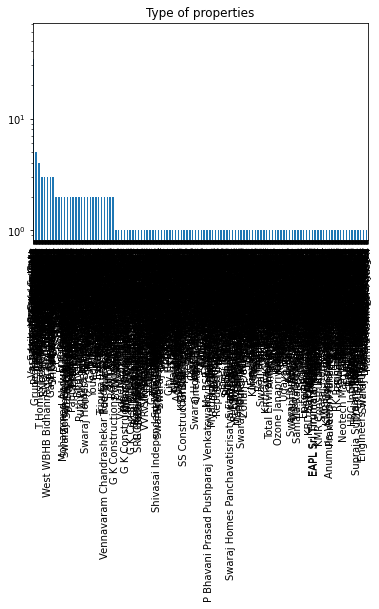

In [34]:
title(b1)